In [38]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


Using One hot encoding  on the categorical column 

In [39]:
penguins_df=pd.get_dummies(penguins_df, columns=['sex'], drop_first=True)

In [40]:
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,36.7,19.3,193.0,3450.0,0
4,39.3,20.6,190.0,3650.0,1


- Standardizing the data to ensure fairness and effectiveness of the algorithm 

In [41]:
scaler=StandardScaler()
scaler.fit_transform(penguins_df)


array([[-0.90390586,  0.79035987, -1.42534179, -0.56694801,  0.99399394],
       [-0.83043377,  0.12618674, -1.0685765 , -0.50484747, -1.00604235],
       [-0.68348959,  0.43272819, -0.42639899, -1.18795343, -1.00604235],
       ...,
       [ 1.17168063, -0.74234736,  1.50013355,  1.91707363,  0.99399394],
       [ 0.21654349, -1.20215952,  0.78660298,  1.23396768, -1.00604235],
       [ 1.07984052, -0.53798639,  0.85795603,  1.48236985,  0.99399394]])

- Choolsing the best number of clusters using the elbow method

[215298731.95084333, 56747737.09382747, 28334259.73501771, 15861290.88934527, 10738501.603568282, 7990498.983169789, 5801441.388291853, 4667117.418284841, 3553222.716872503]


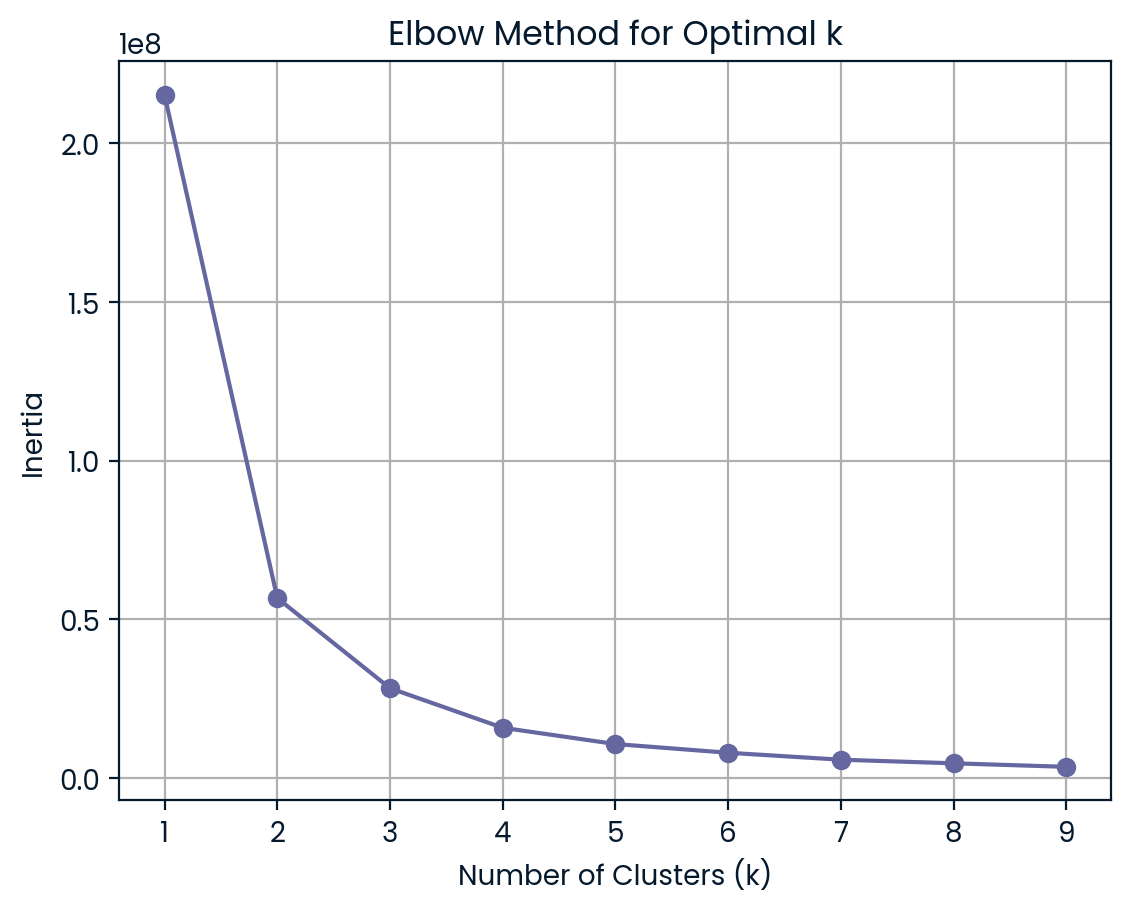

In [42]:

inertia = []

# Loop through values of k from 1 to 9
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(penguins_df)
    inertia.append(kmeans.inertia_)

# Print the inertia values
print(inertia)

# Optional: Plot the Elbow Curve
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


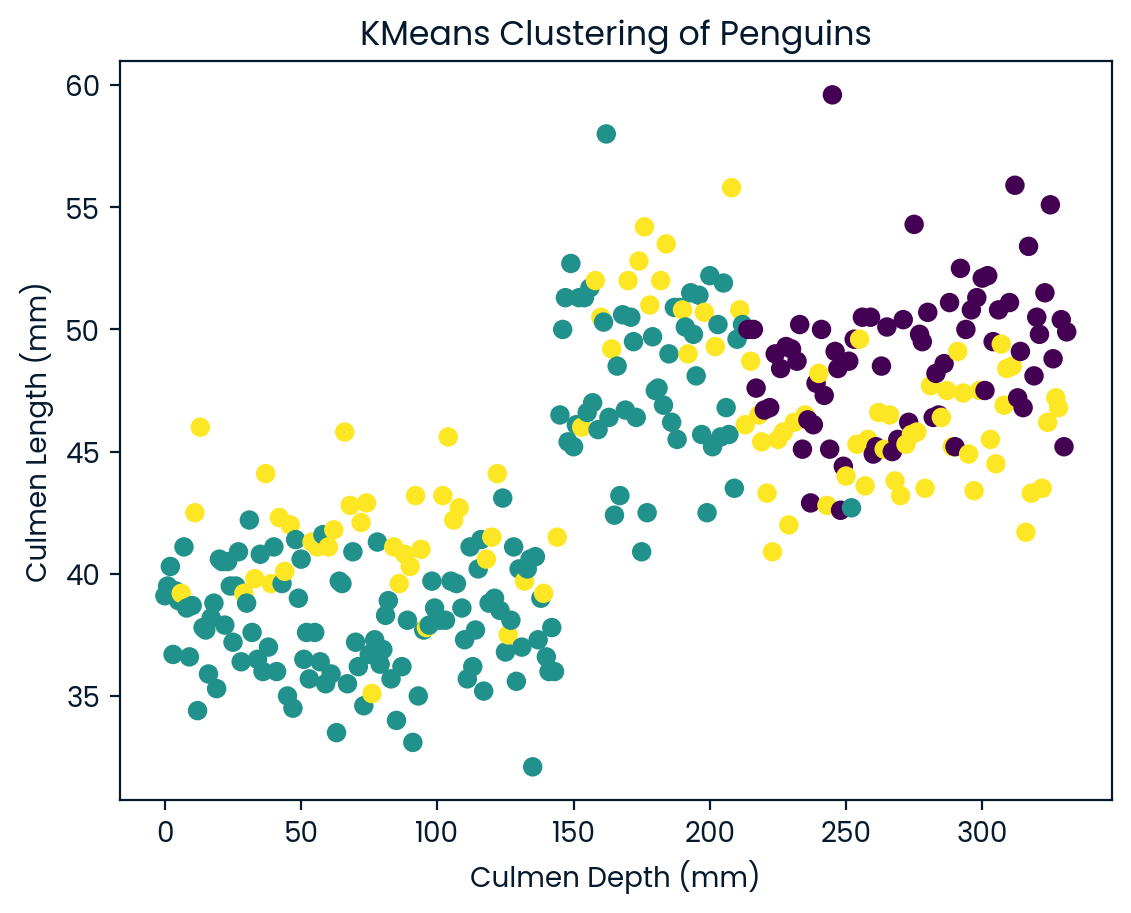

In [43]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'penguins_df' is a DataFrame with the necessary columns
kmeans = KMeans(n_clusters=3, random_state=42).fit(penguins_df)
labels = kmeans.labels_

# Corrected the column name from 'label' to 'culmen_depth_mm'
plt.scatter(penguins_df.index, penguins_df['culmen_length_mm'], c=labels)
plt.xlabel('Culmen Depth (mm)')
plt.ylabel('Culmen Length (mm)')
plt.title('KMeans Clustering of Penguins')
plt.show()

In [44]:
numeric_columns = penguins_df.drop('sex_MALE', axis=1)
numeric_columns['label'] = kmeans.labels_

stat_penguins = numeric_columns.groupby('label').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,48.935714,15.531429,220.614286,5435.357143
1,41.286335,18.037267,190.086957,3522.049689
2,44.974257,16.867327,204.722772,4445.792079
